In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
file = r"C:\\Users\\Masood\\Ackerman\\cifar-10-batches-py"
dirs = ["\\data_batch_1","\\data_batch_2","\\data_batch_3","\\data_batch_4","\\data_batch_5","\\test_batch"]

j = 0
all_files = [1,2,3,4,5,6]
for i in dirs:
    all_files[j] = unpickle(file+i)
    j+=1
type(all_files)

list

In [4]:
data_batch_1 = all_files[0]
data_batch_2 = all_files[1]
data_batch_3 = all_files[2]
data_batch_4 = all_files[3]
data_batch_5 = all_files[4]
X_train = np.concatenate((data_batch_1[b"data"],data_batch_2[b"data"],data_batch_3[b"data"],data_batch_4[b"data"],data_batch_5[b"data"]))
Y_train = np.concatenate((data_batch_1[b"labels"],data_batch_2[b"labels"],data_batch_3[b"labels"],data_batch_4[b"labels"],data_batch_5[b"labels"]))
(X_train.shape),(Y_train.shape)

((50000, 3072), (50000,))

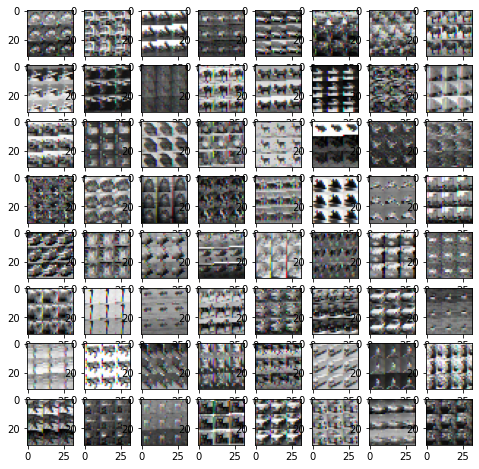

In [13]:
images = X_train.reshape((50000,32,32,3))
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    plt.imshow(images[i],cmap = plt.cm.bone)
plt.show()

In [6]:
testing_data = all_files[5]
X_test = testing_data[b"data"]
Y_test = testing_data[b"labels"]
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test.shape,Y_test.shape

((10000, 3072), (10000,))

In [7]:
pca = PCA()
pca.fit_transform(X_train)

array([[-1.63225950e+03,  6.95904885e+02,  3.82936183e+02, ...,
        -1.94383396e-01, -2.96716275e-01, -8.91909421e-02],
       [ 2.11594763e+02, -2.42235521e+02,  1.53095691e+03, ...,
         2.76508201e-02,  1.47062424e-01, -1.96606511e-01],
       [ 1.97120094e+03, -2.93813609e+03, -7.02173229e+02, ...,
        -2.66373278e-01, -5.45969636e-02, -1.00334729e-01],
       ...,
       [ 1.80373380e+02, -2.89234292e+03, -1.00448294e+02, ...,
        -9.69870999e-02,  4.75402487e-01,  3.69202335e-01],
       [ 2.89881680e+03, -8.60874301e+02,  1.41938040e+03, ...,
        -1.19109692e-01,  1.89968105e-01, -4.26015893e-01],
       [ 1.06916310e+03, -3.01968063e+02, -1.13372056e+03, ...,
         2.46831906e-01,  6.12928127e-02, -7.15290870e-03]])

In [8]:
k = 0
total = sum(pca.explained_variance_)
curr = 0
while curr/total < 0.99:
    curr+=pca.explained_variance_[k]
    k+=1
k

658

In [9]:
pca =PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(50000, 658)

In [10]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(10000, 658)

In [11]:
clf = SVC()
clf.fit(X_train_pca,Y_train)
# grid = {"C" : [1,1e1,1e2], "gamma" : [1e-1,1e-2,1e-3]}
# gs = GridSearchCV(clf,grid)
# gs.fit(X_train_pca,data_batch_1[b"labels"])
# gs.score(X_test_pca,Y_test)
Y_pred = clf.predict(X_test_pca)
print(clf.score(X_test_pca,Y_test))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.5444
[[622  24  59  17  22  13  19  27 142  55]
 [ 33 644  21  41   9  16  16  20  50 150]
 [ 84  24 408  89 132  63 111  50  24  15]
 [ 32  30  93 385  56 165 122  41  25  51]
 [ 48  14 161  67 437  40 129  68  21  15]
 [ 21  13  86 195  72 436  84  48  21  24]
 [ 11  17  63  82  97  45 643  15  13  14]
 [ 36  22  51  74  72  67  35 568  16  59]
 [ 85  67  17  24  20  18  15  18 685  51]
 [ 42 151  11  41   9  14  28  38  50 616]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.64      0.64      0.64      1000
           2       0.42      0.41      0.41      1000
           3       0.38      0.39      0.38      1000
           4       0.47      0.44      0.45      1000
           5       0.50      0.44      0.46      1000
           6       0.53      0.64      0.58      1000
           7       0.64      0.57      0.60      1000
           8       0.65      0.69      0.67      1000
           9       0.

In [12]:
np.savetxt("Y_CIFAR_PREDICT.csv",Y_pred,fmt="%.f",delimiter=",")
df = pd.read_csv("Y_CIFAR_PREDICT.csv")
ans = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
print(df.columns)
df.columns = ["cat"]
#df.columns = ['']
def encoder_(num):
    return ans[num]

df["cat"]= df["cat"].apply(encoder_)
df.to_csv("Y_CIFAR_PREDICT.csv",index=False)

Index(['3'], dtype='object')
